# Binary Classification: Telcom company Customer Churn Classification
## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

## Dataset Attributes
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# Load dataset

In [66]:
!pip install xgboost


In [67]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, balanced_accuracy_score
from sklearn.impute import SimpleImputer


In [68]:
df = pd.read_csv(r'/Users/surajvamshi77/Downloads/midterm/Problem1/dataset/train.csv')
df_test = pd.read_csv(r'/Users/surajvamshi77/Downloads/midterm/Problem1/dataset/test.csv')

## Data AnalysisSummarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [69]:
df.shape

(6338, 21)

In [70]:
print("Total Number of rows:", len(df))
print("Total Number of columns:", len(df.columns))

Total Number of rows: 6338
Total Number of columns: 21


In [71]:
continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("The continuous features are:",continuous_columns)
categorical_columns = [col for col in df.columns if col not in continuous_columns]
print("The categorical_features are:",categorical_columns)

The continuous features are: ['tenure', 'MonthlyCharges', 'TotalCharges']
The categorical_features are: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [72]:
# Convert 'TotalCharges' to float, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Verify the conversion
print(df['TotalCharges'].dtype)


float64


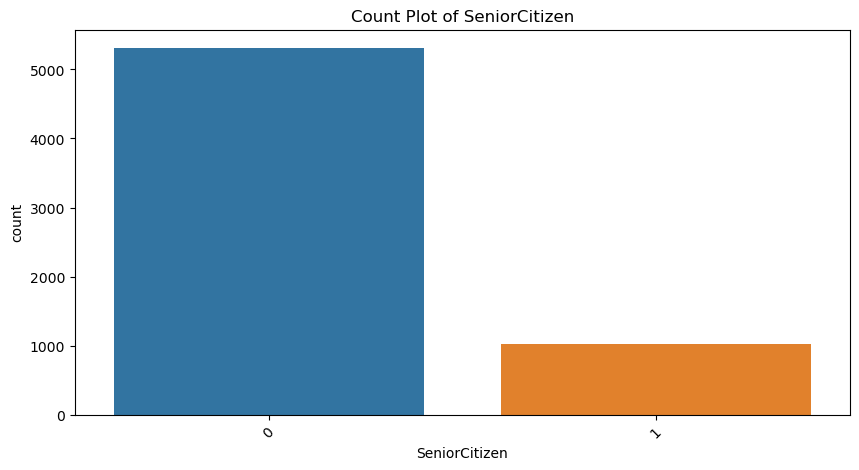

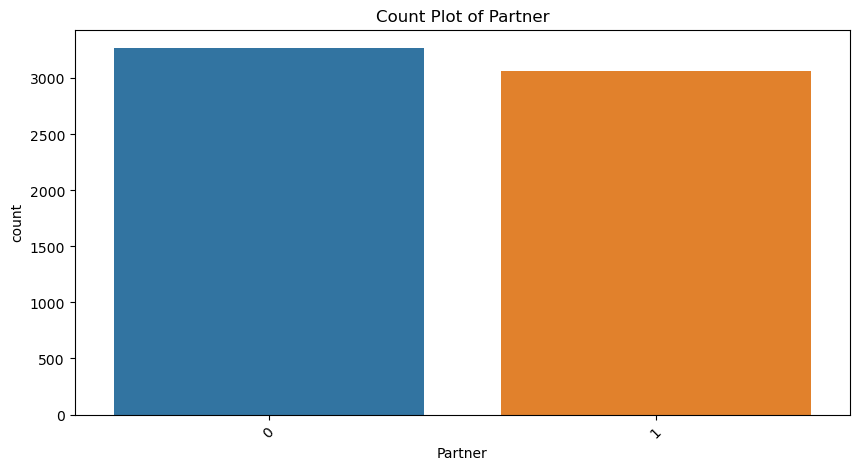

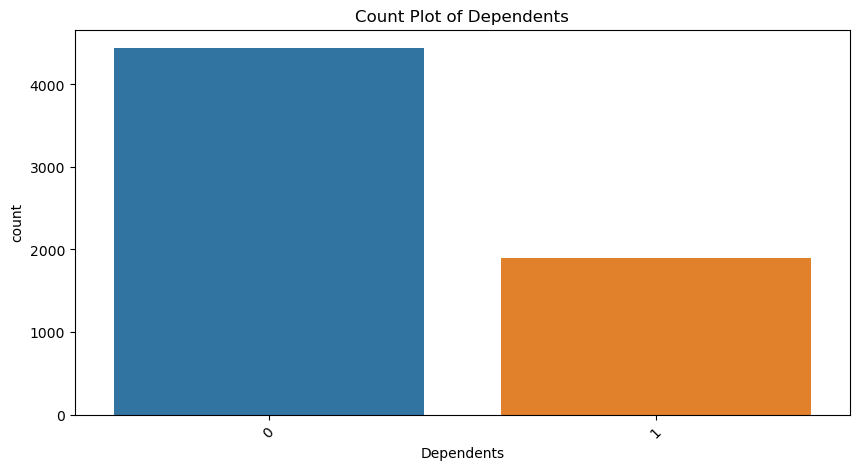

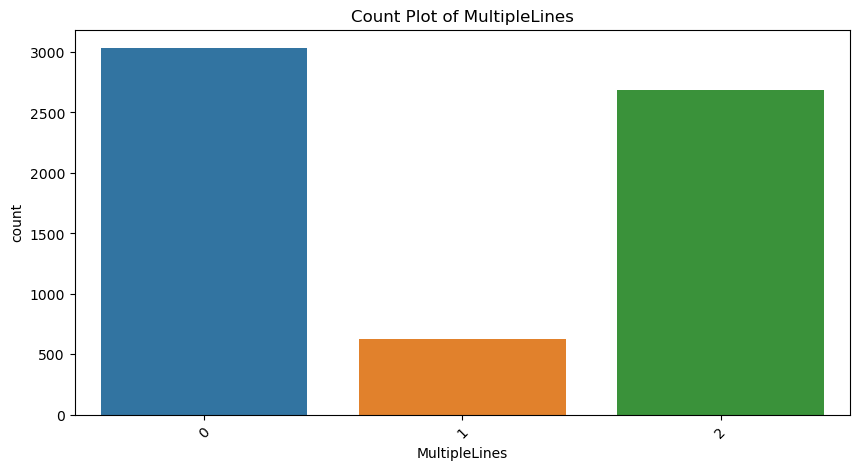

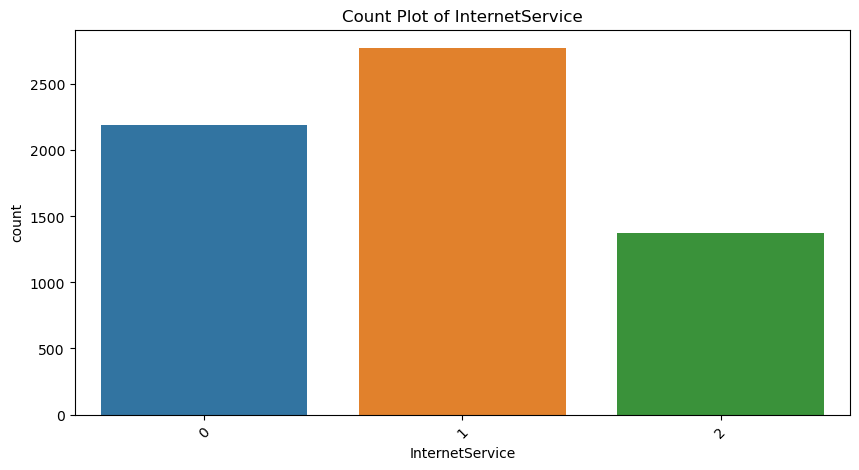

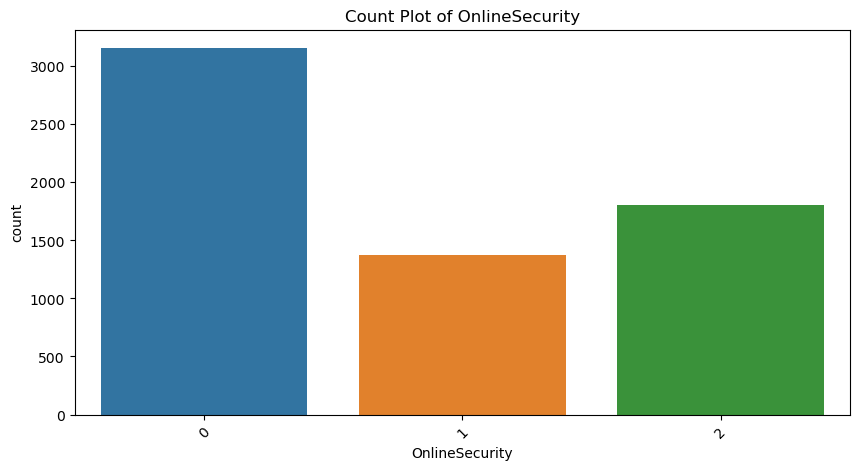

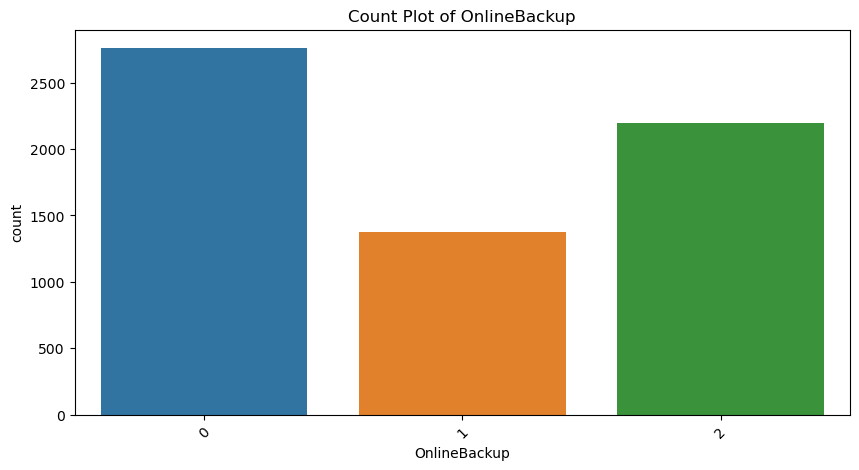

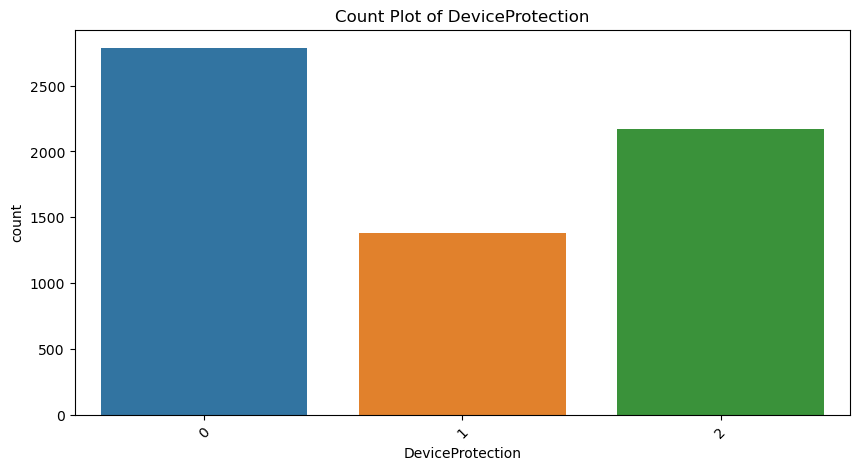

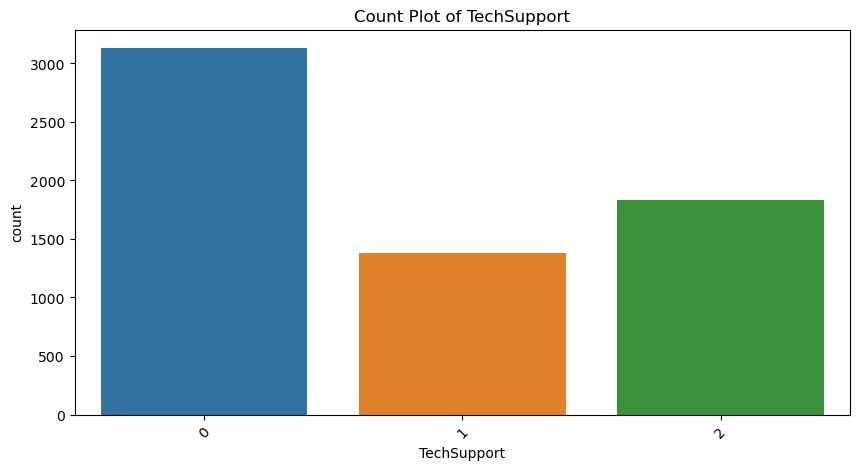

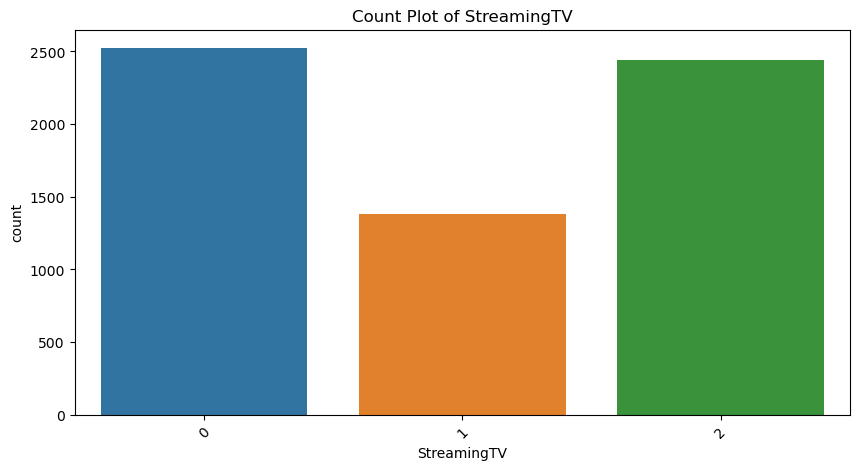

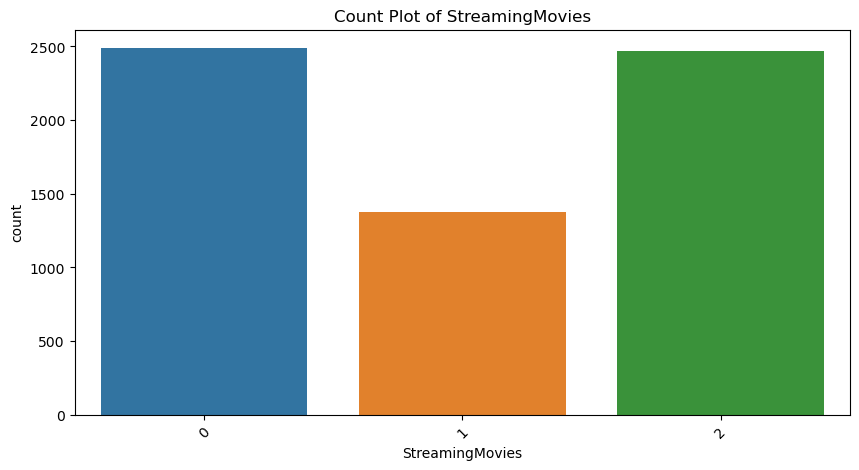

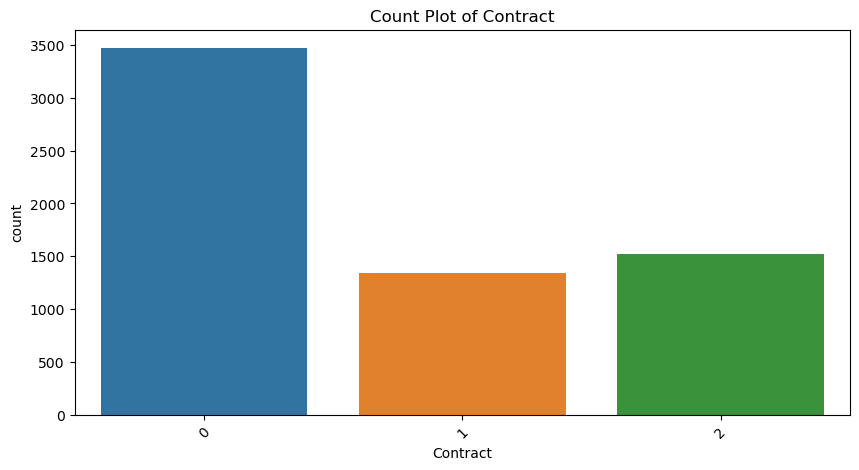

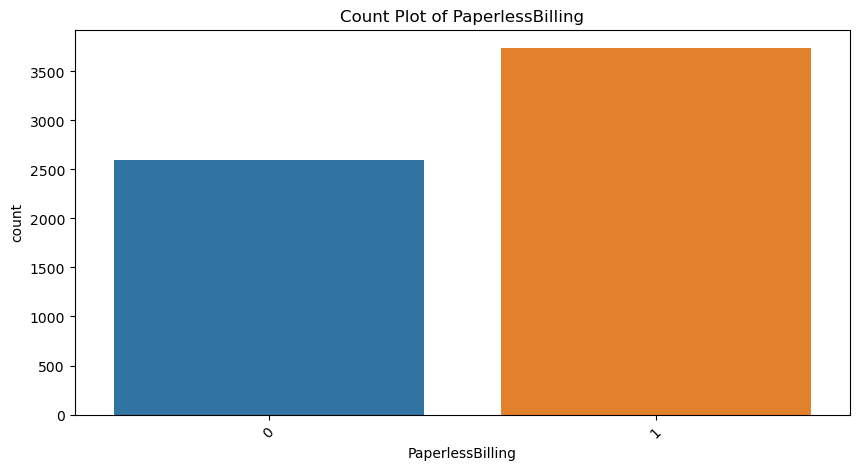

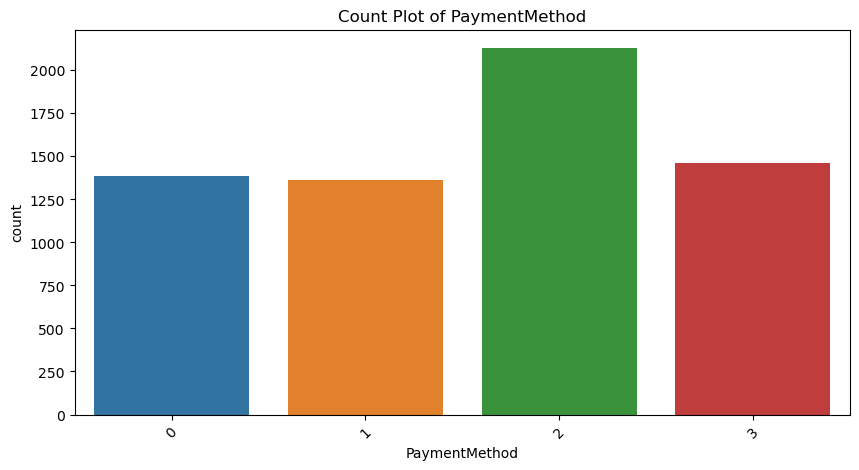

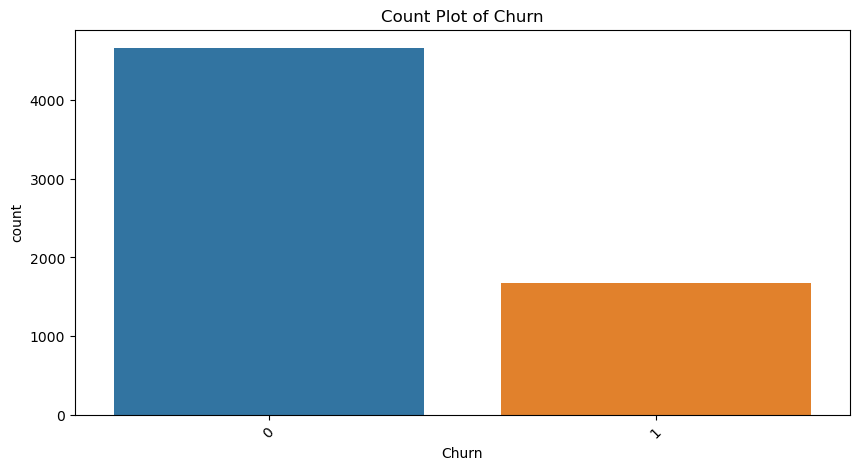

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {feature}")
    plt.show()


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [74]:
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


            tenure  MonthlyCharges  TotalCharges
count  6338.000000     6338.000000   6327.000000
mean     32.358630       64.693760   2284.615845
std      24.537141       30.140955   2269.749306
min       0.000000       18.250000     18.800000
25%       9.000000       35.450000    401.400000
50%      29.000000       70.300000   1398.250000
75%      55.000000       89.900000   3809.500000
max      72.000000      118.750000   8684.800000


In [75]:
print("\nValue Counts for Categorical Attributes:")
print("Gender:\n", df['gender'].value_counts())
print("\nSeniorCitizen:\n", df['SeniorCitizen'].value_counts())
print("\nPartner:\n", df['Partner'].value_counts())
print("\nDependents:\n", df['Dependents'].value_counts())
print("\nPhoneService:\n", df['PhoneService'].value_counts())
print("\nMultipleLines:\n", df['MultipleLines'].value_counts())
print("\nInternetService:\n", df['InternetService'].value_counts())
print("\nOnlineSecurity:\n", df['OnlineSecurity'].value_counts())
print("\nOnlineBackup:\n", df['OnlineBackup'].value_counts())
print("\nDeviceProtection:\n", df['DeviceProtection'].value_counts())
print("\nTechSupport:\n", df['TechSupport'].value_counts())
print("\nStreamingTV:\n", df['StreamingTV'].value_counts())
print("\nStreamingMovies:\n", df['StreamingMovies'].value_counts())
print("\nContract:\n", df['Contract'].value_counts())
print("\nPaperlessBilling:\n", df['PaperlessBilling'].value_counts())
print("\nPaymentMethod:\n", df['PaymentMethod'].value_counts())
print("\nChurn:\n", df['Churn'].value_counts())


Value Counts for Categorical Attributes:
Gender:
 Male      3221
Female    3117
Name: gender, dtype: int64

SeniorCitizen:
 0    5313
1    1025
Name: SeniorCitizen, dtype: int64

Partner:
 No     3270
Yes    3068
Name: Partner, dtype: int64

Dependents:
 No     4440
Yes    1898
Name: Dependents, dtype: int64

PhoneService:
 Yes    5717
No      621
Name: PhoneService, dtype: int64

MultipleLines:
 No                  3034
Yes                 2683
No phone service     621
Name: MultipleLines, dtype: int64

InternetService:
 Fiber optic    2774
DSL            2187
No             1377
Name: InternetService, dtype: int64

OnlineSecurity:
 No                     3155
Yes                    1806
No internet service    1377
Name: OnlineSecurity, dtype: int64

OnlineBackup:
 No                     2762
Yes                    2199
No internet service    1377
Name: OnlineBackup, dtype: int64

DeviceProtection:
 No                     2787
Yes                    2174
No internet service    1377
N

Text(0.5, 1.0, 'Boxplot of TotalCharges')

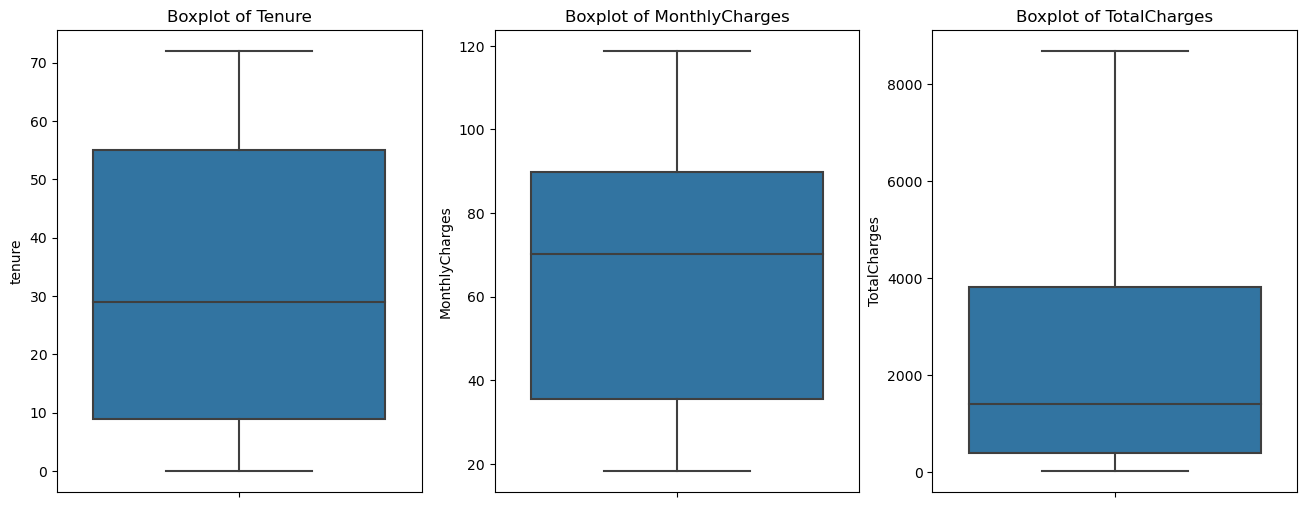

In [76]:
# Create boxplots for tenure, MonthlyCharges, and TotalCharges
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='tenure', data=df)
plt.title('Boxplot of Tenure')
plt.subplot(1, 3, 2)
sns.boxplot(y='MonthlyCharges', data=df)
plt.title('Boxplot of MonthlyCharges')
plt.subplot(1, 3, 3)
sns.boxplot(y='TotalCharges', data=df)
plt.title('Boxplot of TotalCharges')



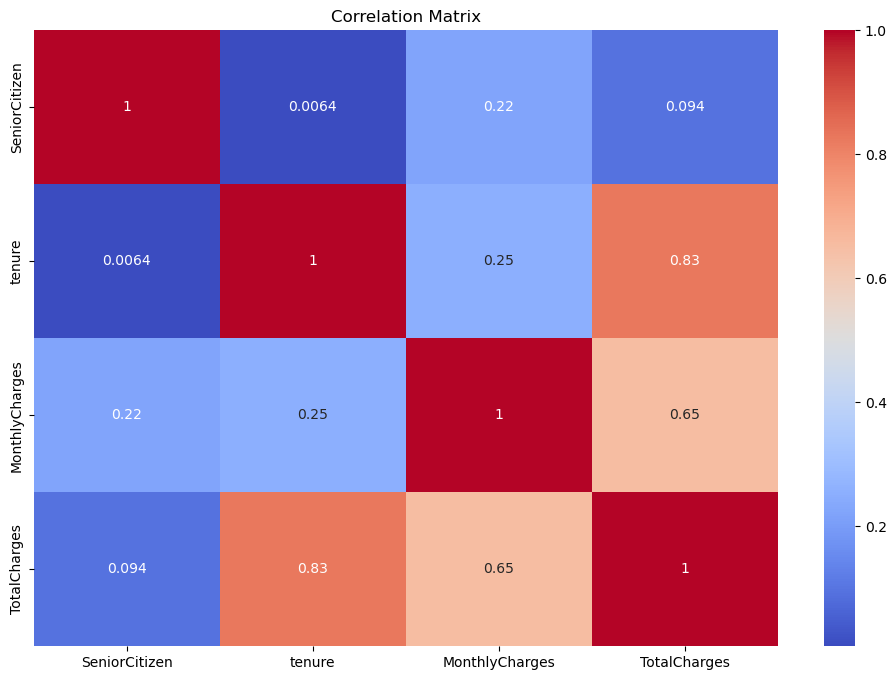

In [77]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()





In [78]:
# Bar plots for categorical attributes
cat_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

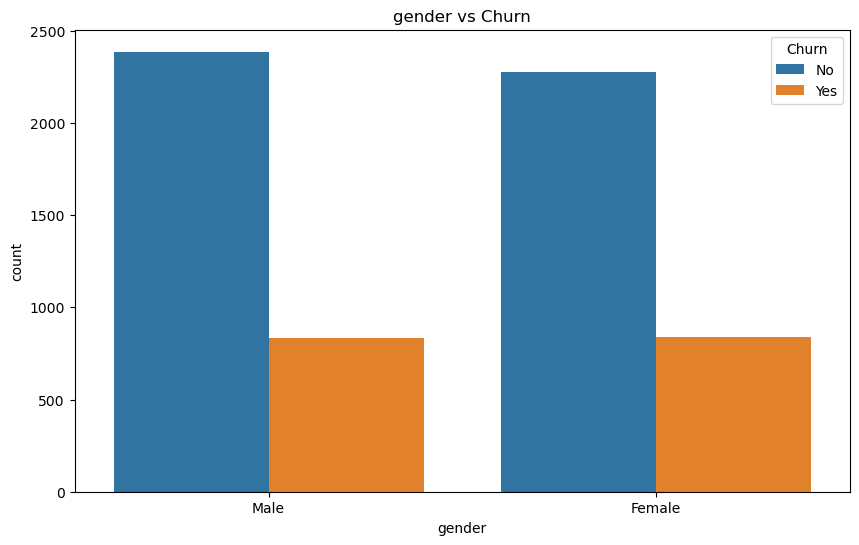

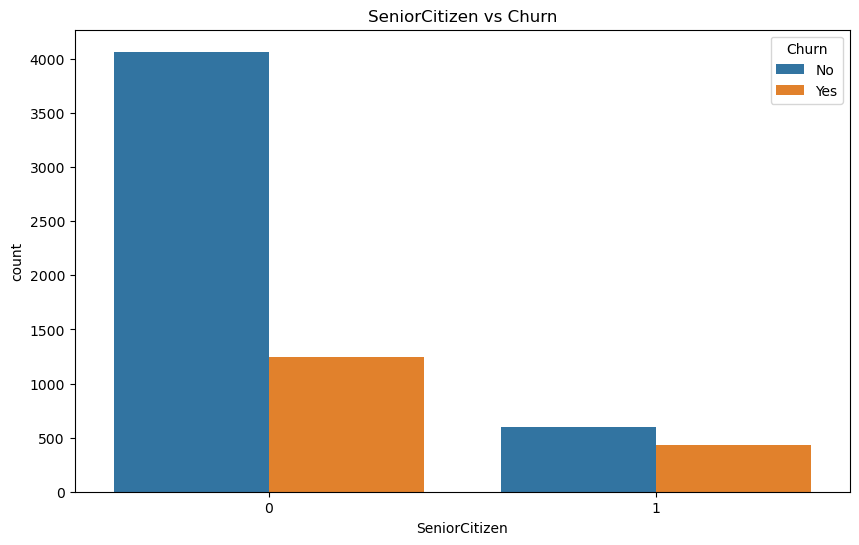

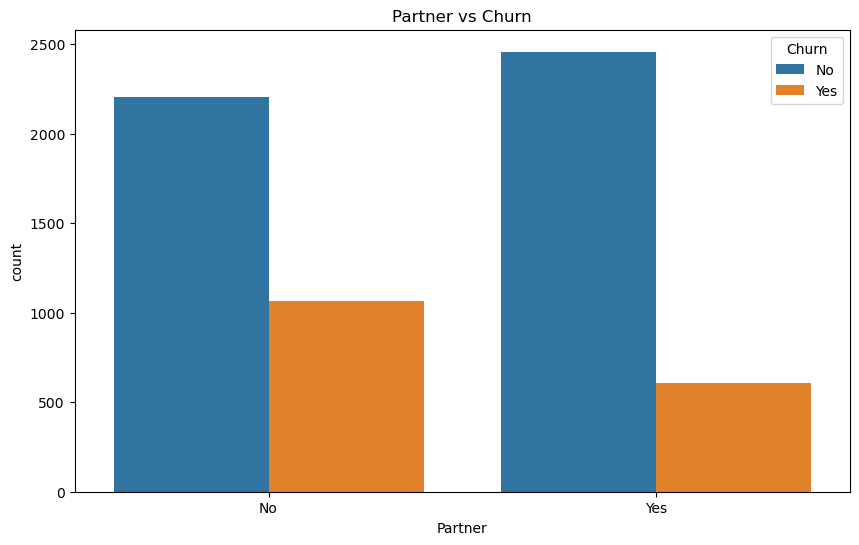

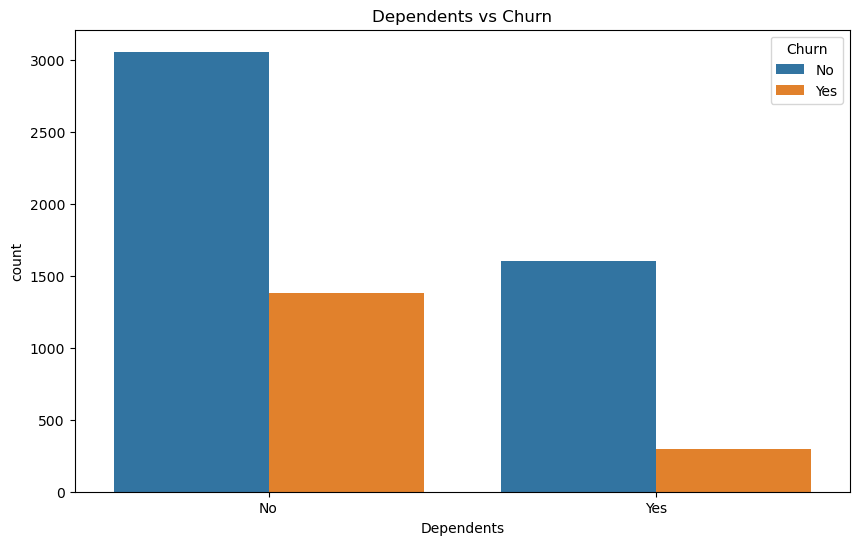

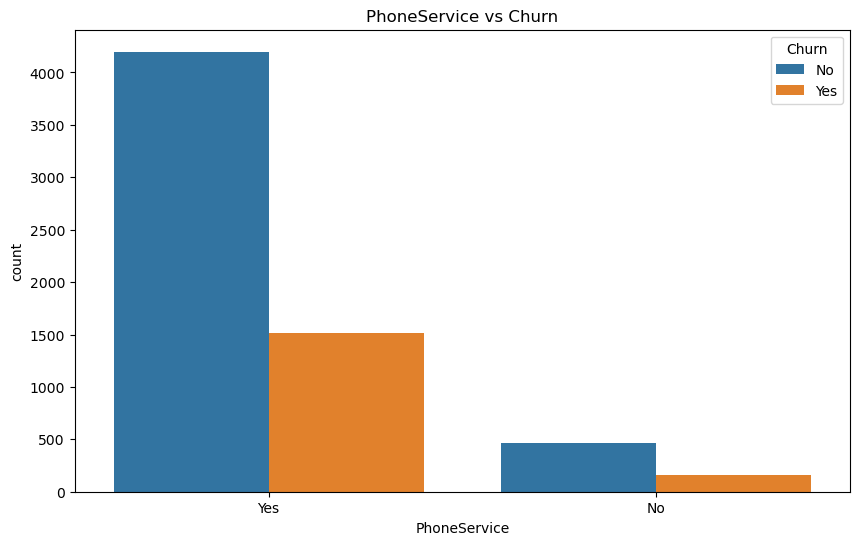

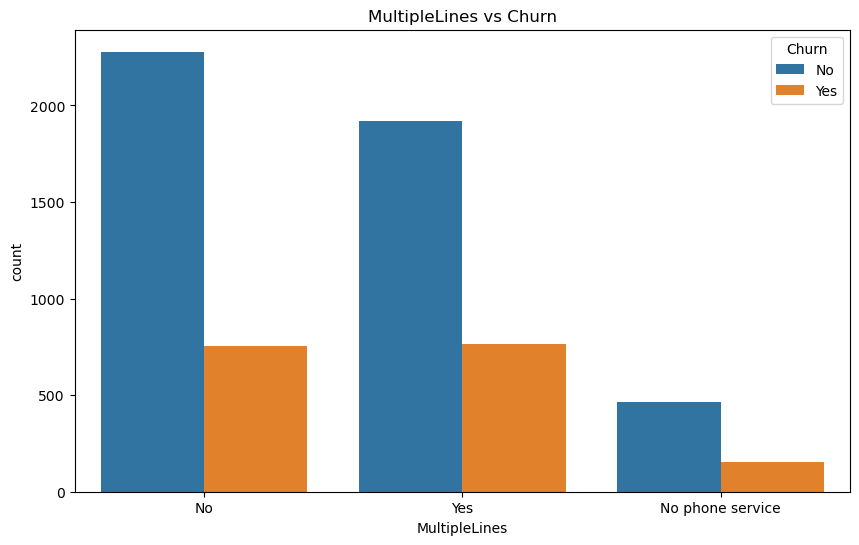

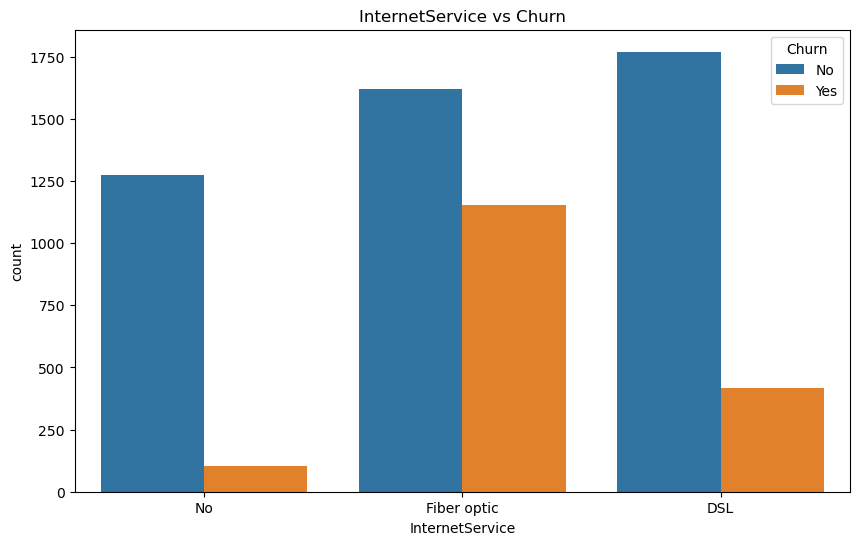

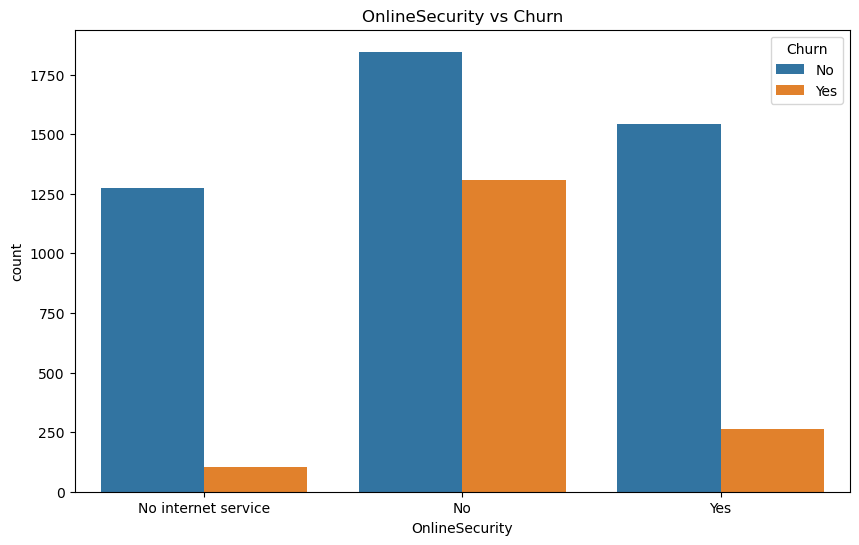

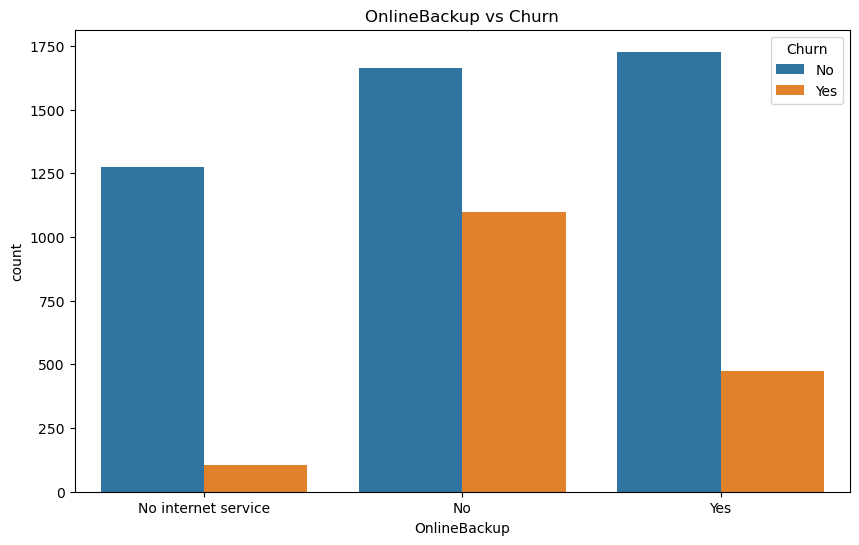

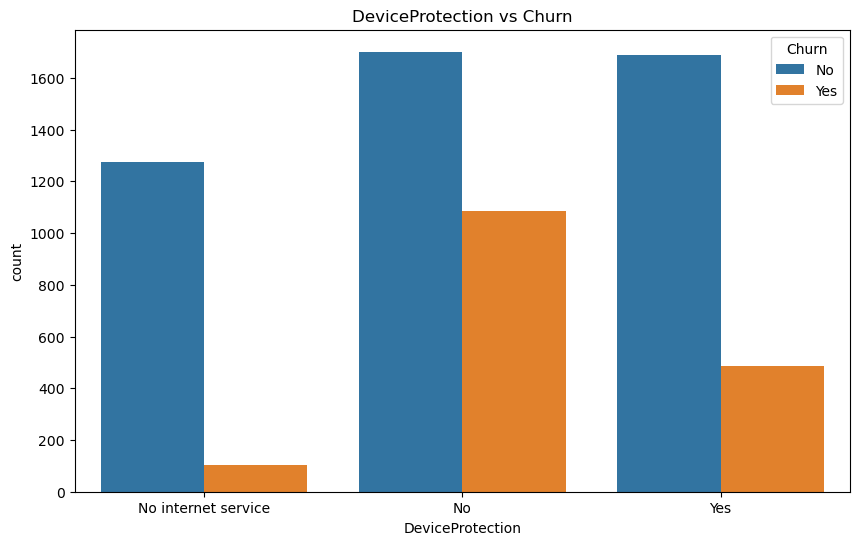

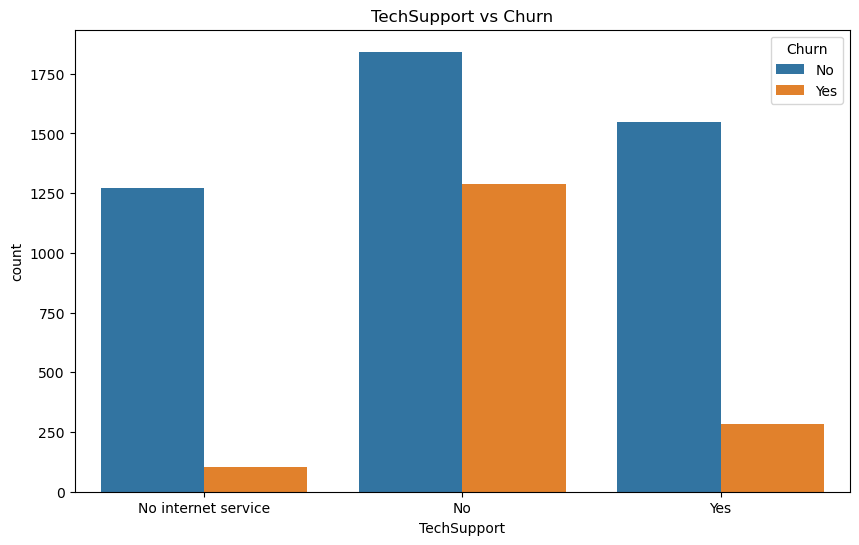

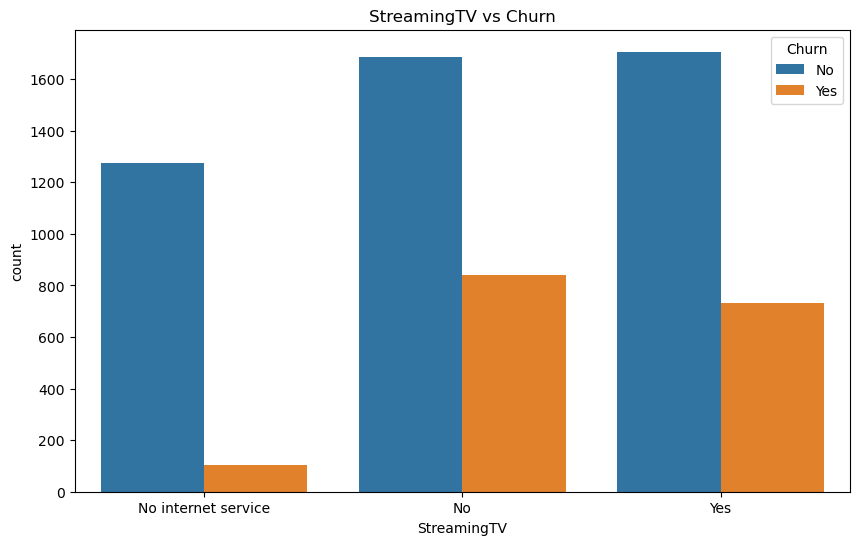

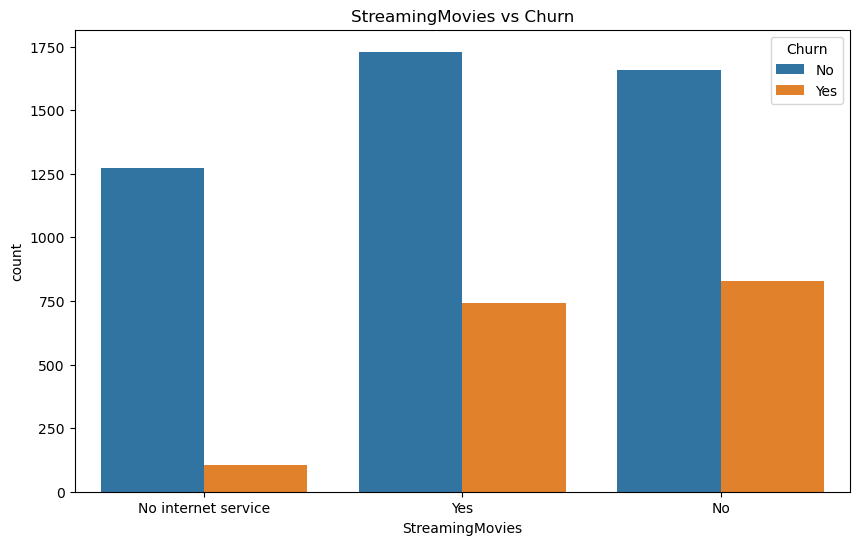

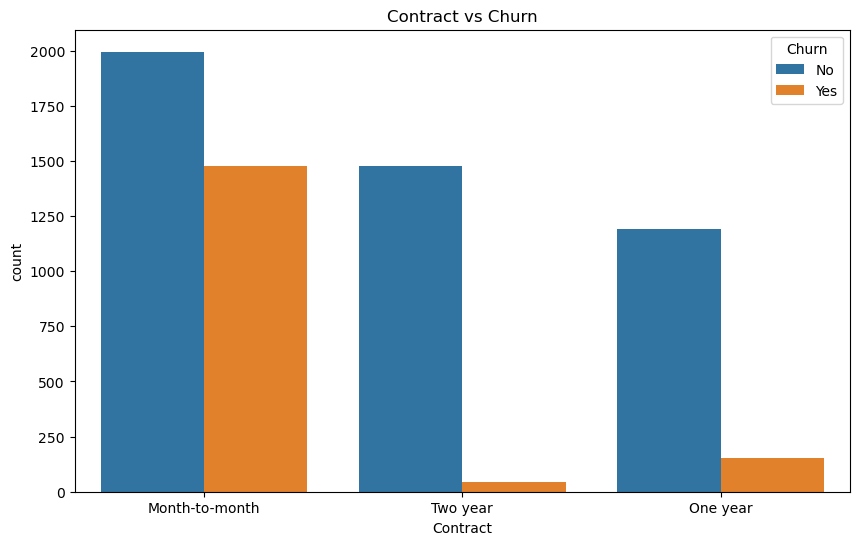

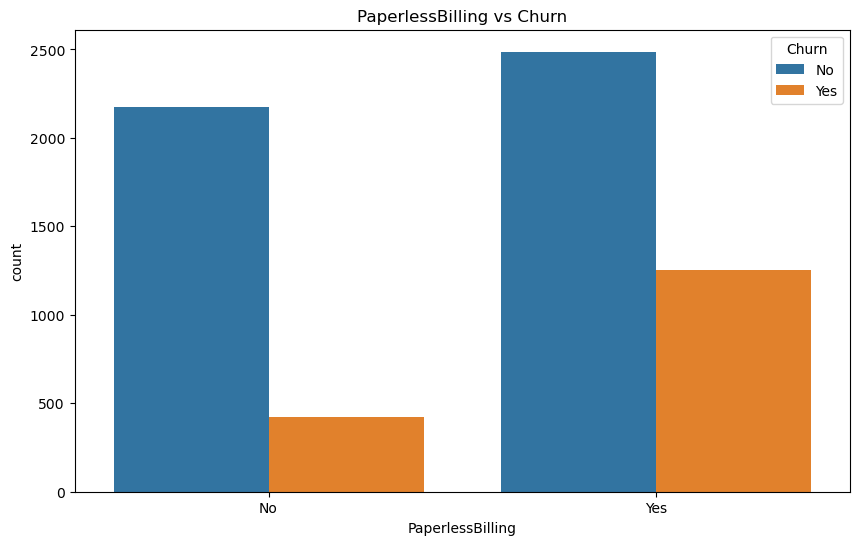

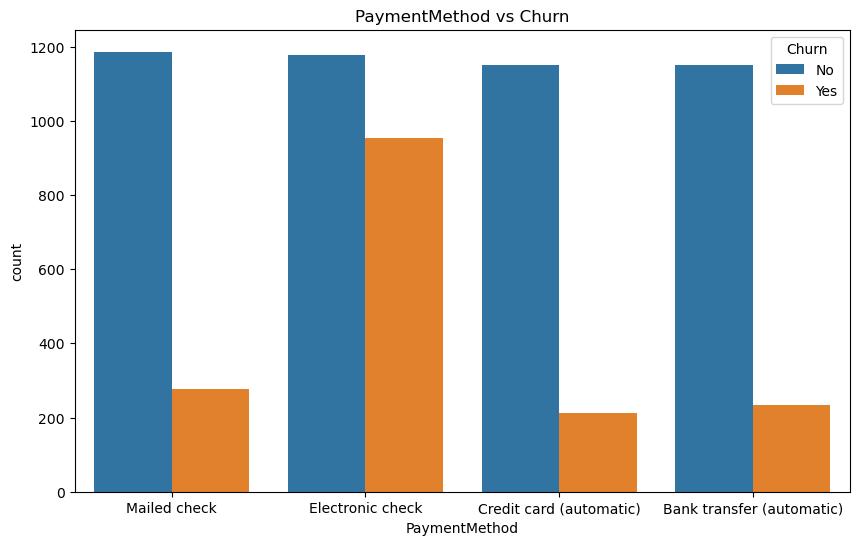

In [79]:
for col in cat_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# NOTICABLE TRAITS
1. 'Churn' could be considered during the modeling process.'
2. Total Charges is converted from object to float.
3. In Tenure we observe that there are many customers who are having less tenures.
4. For Categorical Attributes Encooding is needed.
5. There are  NULL VALUES in Total Charges.


## Data Pre-processing & Feature Engineering 
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Perform Feature Engineering on the dataset.

**Hint** : Perform few statistical tests (Eg: ANOVA) on the dataset and Data Scaling, Sampling as needed. Based on that, check which columns can be eliminated.

**Hint** : Check for any null values in the dataset and perform necessary actions. Also, encoding categorical columns necessarily.

In [80]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# ENCODING

In [81]:
#df.dropna(inplace=True)

In [82]:
#df_num = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
#df_num.head()
#df_num.shape

In [83]:
#df_cat = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
#df_cat.head()
#df_cat.shape

In [84]:
#df_cat.head()

In [85]:
df.drop('customerID', axis=1, inplace=True)

In [86]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', pd.NA, regex=True)

In [87]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [88]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [89]:
#2. null value handling
df['TotalCharges'] = df['TotalCharges'].fillna(method='ffill')

In [90]:
from scipy.stats import chi2_contingency

In [91]:
p_values_custom = []

for col in categorical_columns:  # Exclude the target column
    if col != 'customerID' and col != 'Churn':
        contingency_table = pd.crosstab(df[col], df['Churn'])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
        p_values_custom.append((col, p_val))

sorted_p_values_custom = sorted(p_values_custom, key=lambda x: x[1])
print("Sorted p-values for each feature:")
for feature, p_value in sorted_p_values_custom:
    print(f"{feature}: {p_value}")


Sorted p-values for each feature:
Contract: 1.687883159828126e-229
OnlineSecurity: 4.119549579373494e-164
TechSupport: 2.607644756577371e-156
InternetService: 1.4234916067095093e-140
PaymentMethod: 1.073735731546015e-120
OnlineBackup: 1.2166070248324645e-116
DeviceProtection: 1.4328923647928712e-108
StreamingMovies: 2.8350820881530613e-72
StreamingTV: 3.619336134410334e-72
PaperlessBilling: 1.5693910262568274e-52
Dependents: 1.2954498345371533e-37
SeniorCitizen: 8.607601190042314e-34
Partner: 1.7646587387604017e-30
MultipleLines: 0.007898315771526563
gender: 0.36971242927326486
PhoneService: 0.4654595163952696


In [92]:
columns_drop=['PhoneService','gender']
df = df.drop(columns_drop, axis=1)

In [93]:
# Perform ANOVA for each continuous column
for col in continuous_columns:
    churn_values = []
    for churn_value in df['Churn'].unique():
        churn_values.append(df[df['Churn'] == churn_value][col])
    f_statistic, p_value = f_oneway(*churn_values)
    print(f"ANOVA for {col}: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}")


ANOVA for tenure: F-statistic=865.46, p-value=0.0000
ANOVA for MonthlyCharges: F-statistic=240.65, p-value=0.0000
ANOVA for TotalCharges: F-statistic=250.79, p-value=0.0000


# ANOVA VALUES OF NUMERIC ARE HIGH .DONT REMOVE

In [94]:
label_encoder=LabelEncoder()
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,26,0,2,1,1,1,1,1,1,0,0,3,20.90,518.30,0
1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90,0
2,1,1,0,18,0,1,0,0,0,0,0,2,0,0,2,78.55,1422.65,1
3,1,0,0,15,0,1,0,2,0,0,0,0,0,1,1,75.30,1147.45,1
4,0,0,0,2,0,2,1,1,1,1,1,1,0,1,3,20.45,42.45,0


In [95]:
corr_matrix_custom = df.corr()
corr_with_label_custom = corr_matrix_custom['Churn'].drop('Churn')
sorted_corr_custom = corr_with_label_custom.sort_values(ascending=False)
print("Sorted correlations with 'Churn' column:")
for feature, correlation in sorted_corr_custom.items():
    print(f"{feature}: {correlation}")


Sorted correlations with 'Churn' column:
PaperlessBilling: 0.1919581025756982
MonthlyCharges: 0.1912904948636669
SeniorCitizen: 0.15268464738945384
PaymentMethod: 0.10091167573295781
MultipleLines: 0.03764924375797243
StreamingMovies: -0.03396432833264643
StreamingTV: -0.03419357206594145
InternetService: -0.04742435623299993
Partner: -0.14449358653404099
Dependents: -0.1614008809526171
DeviceProtection: -0.17861736357478633
OnlineBackup: -0.1943887085452578
TotalCharges: -0.19512796650097428
TechSupport: -0.2757362996951745
OnlineSecurity: -0.2877089817556397
tenure: -0.3466668140290416
Contract: -0.3941796550206485


In [96]:
filtered_corr_custom = sorted_corr_custom[abs(sorted_corr_custom) <= 0.1]
# Get columns to drop
columns_to_drop_custom = filtered_corr_custom.index
# Drop columns from the dataset
df_filtered_custom = df.drop(columns=columns_to_drop_custom)


In [97]:
#Features and Label (X,y)
X = df1.drop(columns=['Churn'])
y = df1['Churn']

In [98]:
X.shape

(6338, 13)

In [99]:
df1.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
mms = MinMaxScaler()
X_sc_custom = mms.fit_transform(X)

In [106]:
# Create SMOTE object
smote_custom = SMOTE()
X_resampled_custom, y_resampled_custom = smote_custom.fit_resample(X_sc_custom, y)

# Create a DataFrame with resampled data
df_resampled_custom = pd.concat([pd.DataFrame(X_resampled_custom, columns=X.columns), pd.DataFrame(y_resampled_custom, columns=['Churn'])], axis=1)


# MODEL BUILDING

In [124]:
#TRAINING 3 MODELS

In [108]:
#train validation split
X_train, X_val, y_train, y_val = train_test_split(X_resampled_custom, y_resampled_custom, test_size=0.2, random_state=42)

In [110]:
#xgboost
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_val) 
accuracy_score(y_val, y_pred)


0.8269024651661308

In [114]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val) 
accuracy_score(y_val, y_pred)


0.8365487674169346

In [115]:
#decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val) 
accuracy_score(y_val, y_pred)


0.7631296891747053

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.77       926
           1       0.75      0.85      0.80       940

    accuracy                           0.78      1866
   macro avg       0.79      0.78      0.78      1866
weighted avg       0.79      0.78      0.78      1866



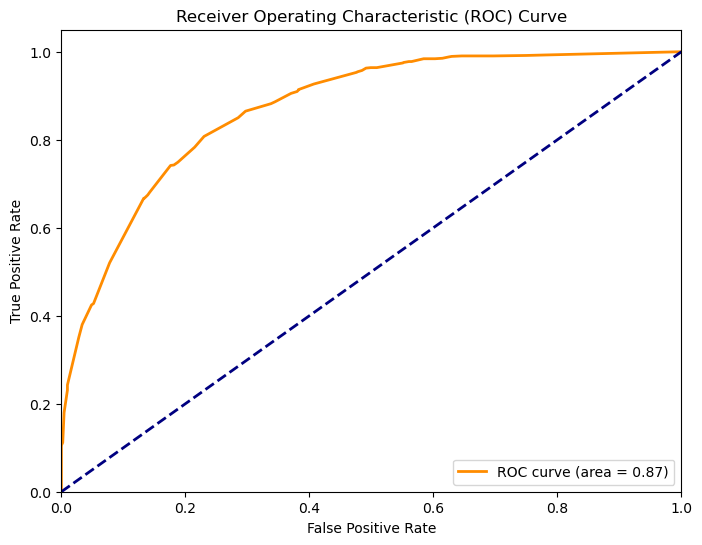

In [116]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 6, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5]
}

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new decision tree classifier with the best parameters
best_model = DecisionTreeClassifier(**best_params)

# Fit the classifier on the training data
best_model.fit(X_train, y_train)

# Generate predictions for the validation data
predictions = best_model.predict(X_val)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_val, predictions))

# Generate predictions for the validation data for ROC curve
predictions_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, _ = roc_curve(y_val, predictions_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       926
           1       0.81      0.85      0.83       940

    accuracy                           0.82      1866
   macro avg       0.82      0.82      0.82      1866
weighted avg       0.82      0.82      0.82      1866



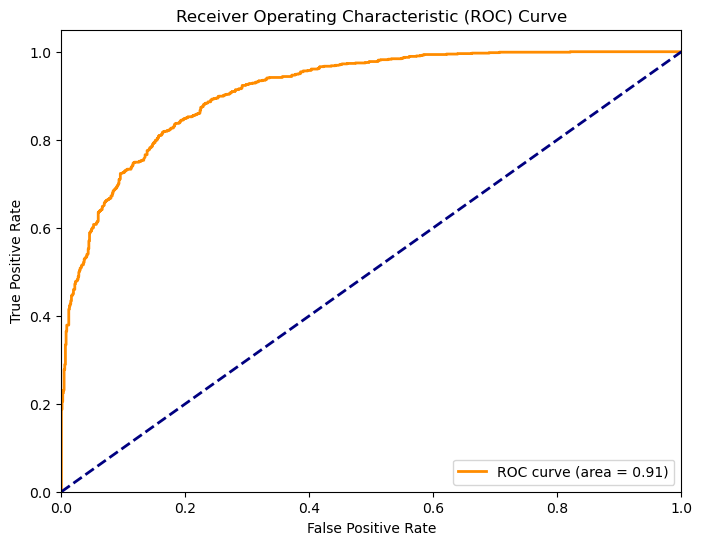

In [118]:
# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [30, 40, 50],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
xgb_best = xgb_grid_search.best_params_

# Create a new XGBoost classifier with the best parameters
xgb_best_model = XGBClassifier(**xgb_best)

# Fit the classifier on the training data
xgb_best_model.fit(X_train, y_train)

# Generate predictions for the validation data
xgb_predictions = xgb_best_model.predict(X_val)

# Print classification report
print("XGBoost Classification Report:")
print(classification_report(y_val, xgb_predictions))

# Generate predictions for the validation data for ROC curve
xgb_predictions_proba = xgb_best_model.predict_proba(X_val)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_predictions_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_xgb, tpr_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [61]:
#2.Random Forest Classifier
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [30,50,80,100],
                 'max_depth': [None,7,8,9],
                 'min_samples_split': [5,6,7,8],
                 'min_samples_leaf': [2,3,4]}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best=rf_grid_search.best_params_
print("Random Forest Classification Report:")
print(classification_report(y_val, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       926
           1       0.81      0.86      0.83       940

    accuracy                           0.83      1866
   macro avg       0.83      0.83      0.83      1866
weighted avg       0.83      0.83      0.83      1866



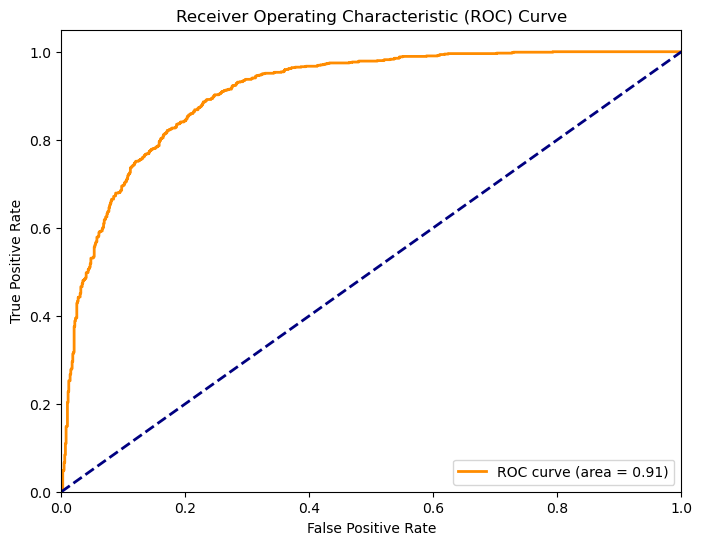

In [119]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [30, 50, 80, 100],
    'max_depth': [None, 7, 8, 9],
    'min_samples_split': [5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4]
}

# Initialize the Random Forest classifier
rf_model_custom = RandomForestClassifier()

# Resample the training data using SMOTE
smote = SMOTE()
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train, y_train)

# Perform grid search
rf_grid_search = GridSearchCV(estimator=rf_model_custom, param_grid=param_grid_rf, cv=5)
rf_grid_search.fit(X_resampled_rf, y_resampled_rf)

# Get the best parameters
rf_best_params = rf_grid_search.best_params_

# Create a new Random Forest classifier with the best parameters
rf_best_model = RandomForestClassifier(**rf_best_params)

# Fit the classifier on the resampled training data
rf_best_model.fit(X_resampled_rf, y_resampled_rf)

# Generate predictions for the validation data
rf_predictions = rf_best_model.predict(X_val)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, rf_predictions))

# Generate predictions for the validation data for ROC curve
rf_predictions_proba = rf_best_model.predict_proba(X_val)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_predictions_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Evaluation and Reporting 

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


# RESULTS

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Iterate over classifiers
for name, model in classifiers.items():
    # Fit the classifier on the training data
    model.fit(X_train, y_train)

    # Generate predictions for the validation data
    predictions = model.predict(X_val)

    # Calculate metrics
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)

    # Print metrics
    print(f"{name} Classification Report:")
    print(classification_report(y_val, predictions))
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("\n")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       926
           1       0.76      0.77      0.77       940

    accuracy                           0.76      1866
   macro avg       0.76      0.76      0.76      1866
weighted avg       0.76      0.76      0.76      1866

Accuracy: 0.7642015005359056
Precision: 0.7620545073375262
Recall: 0.7734042553191489


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       926
           1       0.83      0.86      0.84       940

    accuracy                           0.84      1866
   macro avg       0.84      0.84      0.84      1866
weighted avg       0.84      0.84      0.84      1866

Accuracy: 0.8403001071811361
Precision: 0.8295687885010267
Recall: 0.8595744680851064


XGBoost Classification Report:
              precision    recall  f1-score   support

          

# WE CAN OBSERVE THAT THE ACCURACY OF RANDOM FOREST MODEL IS HIGH AND TESTING ON TEST DATA

In [130]:
def preprocess_data(df):
    df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', pd.NA, regex=True)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
    df = df.drop('customerID', axis=1)
    df['TotalCharges'] = df['TotalCharges'].fillna(method='ffill')
    columns_to_drop=['gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']
    df.drop(columns=columns_to_drop, inplace=True)
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])
    
    mms = MinMaxScaler()
    X_sc = mms.fit_transform(df)
    
    return X_sc


## External validation 

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [131]:
# This is psudo-code. Each student have to use their actual code for this.

# step 1. Load the  data
test = pd.read_csv('/Users/surajvamshi77/Downloads/midterm/Problem1/dataset/test.csv')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
x_test = preprocess_data(test)

# step 3. Choose the best model
your_best_model = model1

# step 4. Make predictions
pred = your_best_model.predict(x_test)

# step 5. Save output as csv file
pred = pd.DataFrame(pred)
pred.replace({0: 'No', 1: 'Yes'}, inplace=True)
pred.to_csv('./submission.csv', index = False)


## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return balanced_accuracy
    